# Trabajo Final 

_Fecha: 16 de mayo 2019_

Enviar un enlace a un repositorio de GitHub que contenga los trabajos realizados durante el semestre, la carpeta debe contener las siguientes entregas:

+ MNIST (digitos) con algoritmo deterministico
+ Tic-tac-toe
+ Sistema experto
+ Opcional (Artificial Life)
+ MNIST (digitos) machine learning - Kmeans
+ MNIST (digitos) deep learning, Tensorflow

# MNIST (dígitos) deep learning, Tensorflow

__Integrantes:__

+ Nombre: Kevin Balanta
+ Nombre: Juan Diaz


Entrenar una red neuronal con el fin de detectar los dígitos de MNIST y comparar sus resultados contra el algoritmo determinístico y el modelo de machine learning kmeans.

Evaluar los resultados contra dos medidas de evaluación (accuracy y tiempo de entramiento). Se recomienda realizar el hold-out con un 80% para entrenamiento y un conjunto de testeo del 20%.


## Comparación contra el algoritmo deterministico

In [1]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn
import array
import numpy as np
import math

In [2]:
#Este metodo me guarda los indices donde esta el dos en digits.image
digits = load_digits()
numImagenes = len(digits.images)
y = digits.target # el método nos provee las etiquetas de las imágenes en un arreglo
indicesOF2 = array.array('i',[])
indicesOF8 = array.array('i',[])
def getAllInd ():
    
    j=0
    k=0
    for i in y:
        if(i==2):
            indicesOF2.append(j)
            
        if(i==8):
            indicesOF8.append(j)
        j=j+1
    #print(indicesOF2)
    print("Cantidad de 2 en los datos: "+str(len(indicesOF2)))
    print("Cantidad de 8 en los datos: "+str(len(indicesOF8)))
    print("Cantidad de datos: "+str(len(digits.images)))
    #for i in indicesOF2:
        #print(y[i])
        

getAllInd()


Cantidad de 2 en los datos: 177
Cantidad de 8 en los datos: 174
Cantidad de datos: 1797


Para el 2
Para el 8
Wall time: 79.7 ms


<Figure size 432x288 with 0 Axes>

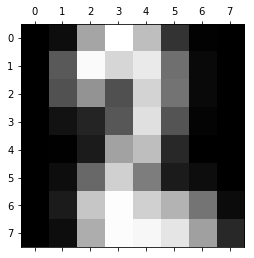

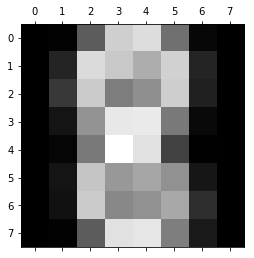

In [3]:
%%time
lenghtForDataTraining2 = math.floor(len(indicesOF2)*0.8)
lenghtForTest2 = len(indicesOF2) - lenghtForDataTraining2

lenghtForDataTraining8 = math.floor(len(indicesOF8)*0.8)
lenghtForTest8 = len(indicesOF8) - lenghtForDataTraining8

dataTraining2 = array.array('i')
dataTest2 = array.array('i')

dataTraining8 = array.array('i')
dataTest8 = array.array('i')
for i in range(0,lenghtForDataTraining2):
    dataTraining2.append(indicesOF2[i])

for i in range(lenghtForDataTraining2,len(indicesOF2)):
    dataTest2.append(indicesOF2[i])
    
for i in range(0,lenghtForDataTraining8):
    dataTraining8.append(indicesOF8[i])

for i in range(lenghtForDataTraining8,len(indicesOF8)):
    dataTest8.append(indicesOF8[i])

quantMatrix2= lenghtForDataTraining2
matrixResult2= digits.images[2]
for i in dataTraining2:
    matrixResult2= matrixResult2 + digits.images[i]
matrixResult2 = matrixResult2/quantMatrix2

quantMatrix8= lenghtForDataTraining8
matrixResult8= digits.images[8]
for i in dataTraining8:
    matrixResult8= matrixResult8 + digits.images[i]
matrixResult8 = matrixResult8/quantMatrix8

pl.gray()
print("Para el 2")
pl.matshow(matrixResult2) # Imprimir una imagen dada

print("Para el 8")
pl.matshow(matrixResult8) # Imprimir una imagen dada


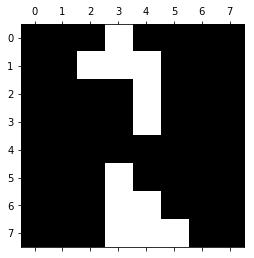

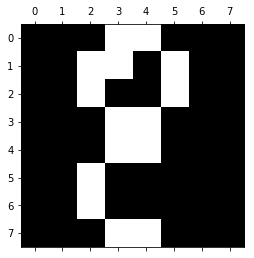

In [4]:
#Me muestra como queda si solo muestro los pixeles que cumplen un criterio
pl.matshow(matrixResult2>11)

pl.matshow(matrixResult8>11)

In [5]:
#Lanza true si cree que es un 2, false de lo contrario
def verifIsTwo(matrixTwo):
    matrixTem = matrixResult2> 11
    isTwo= "true"
    for i in range(0,8):
        for j in range(0,8):
            if(matrixTem[i][j]==1 and matrixTwo[i][j]<3):
                isTwo = "false"
    return isTwo

def verifIsEight(matrixEight):
    matrixTem8 = matrixResult8> 11
    isEight= "true"
    for i in range(0,8):
        for j in range(0,8):
            if(matrixTem8[i][j]==1 and matrixEight[i][j]<1):
                isEight = "false"
    return isEight

#Usa el anterior pasandole todos las matrices con 2 y luego todas las matrices 
def hitPerc():
    k=0
    w=0
    for i in dataTest2:
        if(verifIsTwo(digits.images[i])=="true"):
            k=k+1
    
    for i in dataTest8:
        if(verifIsEight(digits.images[i])=="true"):
            w=w+1
    
    accuracy2=(k/len(dataTest2)) * 100
    accuracy8= (w/len(dataTest8)) * 100
    return (accuracy2, accuracy8, "Total promediado: " + str((accuracy2 + accuracy8)/2))


hitPerc()    

(72.22222222222221, 60.0, 'Total promediado: 66.11111111111111')

Despues de ejecutar el codigo se obtuvo un 72.22% de aciertos verificando que un dos, cuando se testea (20%) el modelo.
El modelo de "entreno" con el 80% de numeros 2 disponibles.

Se obtuvo un 60.0% de aciertos verificando el 8, cuando se testea (20%) el modelo. El modelo se entreno con el 80% de numeros 8 disponibles.
SE OBTIENE UN PROMEDIO GENERAL DE 66.111%

## Comparación contra el mejor modelo KMeans

In [6]:
from sklearn.datasets import load_digits
import sklearn.metrics as metrics
import pylab as pl
import sklearn
import math

In [7]:
digits = load_digits()
percentFit = 0.8
numImagenes = len(digits.images)
limitInferior =  math.floor(numImagenes*percentFit)+1
limitSuperior = math.ceil(numImagenes*percentFit)

In [8]:
y = digits.target[0 : limitInferior] # El método nos provee las etiquetas de las imágenes en un arreglo
w = digits.target[limitSuperior :]
X = digits.images[0 : limitInferior].reshape((len(y), -1)) # Se selecciona el porcentaje de entrenamiento.
Z = digits.images[limitSuperior :].reshape((len(w),-1))

In [9]:
%%time
#from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import pylab as plt

knn = KNeighborsClassifier(4)
fit = knn.fit(X, y)

Wall time: 31.3 ms


Se pueden evaluar las clases estimadas por el modelo vs. las clases reales

In [10]:
w_estimado = fit.predict(Z)
print("Reales   :", w[0:25])
print("Estimados:", w_estimado[0:25])

Reales   : [3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1]
Estimados: [3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1]


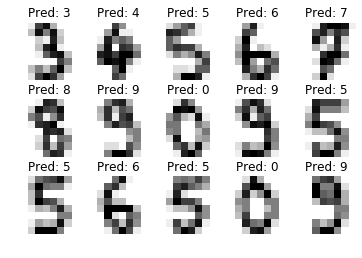

In [11]:
images_and_predictions = list(zip(digits.images[limitSuperior :], w_estimado))
for index, (image, prediction) in enumerate(images_and_predictions[:15]):
    plt.subplot(3,5, index+1) #se crean los placeholders de 3x5 filasXcolumnas
    plt.axis('off')  #se quitan los ejes
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Pred: %i' % prediction)
plt.show()

In [12]:
metrics.accuracy_score(w, w_estimado)

0.9665738161559888

## Contra el modelo de la red neuronal

In [13]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [14]:
def layer(input, weigth_shape, bias_shape):
    w_init = tf.random_normal_initializer(stddev= (2.0/weigth_shape[0]) ** 0.5)
    bias_init = tf.constant_initializer(value=0)
    W = tf.get_variable("W", weigth_shape, initializer = w_init)
    b = tf.get_variable("b", bias_shape, initializer = bias_init)
    return tf.nn.relu(tf.matmul(input, W) + b)

In [15]:
def inference(x):     
    with tf.variable_scope("hidden_1"):
        hidden_1 = layer(x , [784, 256], [256])
    with tf.variable_scope("hidden_2"):
        hidden_2 = layer(hidden_1, [256, 256], [256])
    with tf.variable_scope("output"):
        output = layer(hidden_2, [256, 10], [10])
    return output

In [16]:
def loss(output, y):
    xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)
    return loss

In [17]:
def evaluate(output, y):
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("validation", accuracy)
    return accuracy

In [18]:
def training(cost, global_step):
    tf.summary.scalar("cost", cost)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)
    return train_op

In [19]:
%%time
import tensorflow as tf
# Parameters

learning_rate = 0.01
training_epochs = 300
batch_size = 100
display_step = 5
train_losses, test_losses = [], []


with tf.Graph().as_default():
    # mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784])    
    # 0-9 digits recognition => 10 classes
    y = tf.placeholder(tf.float32, [None, 10])    
    output = inference(x)    
    cost = loss(output, y) 
    
    global_step = tf.Variable(0, name='global_step', trainable=False)    
    train_op = training(cost, global_step)    
    eval_op = evaluate(output, y)
    
    summary_op = tf.summary.merge_all()    
    saver = tf.train.Saver()
    
    sess = tf.Session()    
    summary_writer = tf.summary.FileWriter("mnist_logs/", graph=sess.graph)
    
    init_op = tf.global_variables_initializer()    
    sess.run(init_op)
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            mbatch_x, mbatch_y = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            feed_dict = {x : mbatch_x, y : mbatch_y}
            sess.run(train_op, feed_dict=feed_dict)
            # Compute average loss
            minibatch_cost = sess.run(cost, feed_dict=feed_dict)
            avg_cost += minibatch_cost/total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            val_feed_dict = {
                x : mnist.validation.images,
                y : mnist.validation.labels
            }
            accuracy = sess.run(eval_op, feed_dict=val_feed_dict)
            print ("Validation Error:", (1 - accuracy))
            train_losses.append(1 - accuracy)
            summary_str = sess.run(summary_op, feed_dict=feed_dict)
            summary_writer.add_summary(summary_str, sess.run(global_step))
            
            saver.save(sess, "mnist_logs/model-checkpoint", global_step=global_step)
            
    print("Optimization Finished!")
    
    test_feed_dict = {
        x : mnist.test.images,
        y : mnist.test.labels
    }
   accuracy = sess.run(eval_op, feed_dict=test_feed_dict)
    #writer = tf.summary.FileWriter("logistic_logs3/", graph=sess.graph)
    #writer.add_graph(tf.get_default_graph())
    print("Test Accuracy:", accuracy)

Instructions for updating:
Colocations handled automatically by placer.
Validation Error: 0.3500000238418579
Validation Error: 0.16180002689361572
Validation Error: 0.14219999313354492
Validation Error: 0.13239997625350952
Validation Error: 0.1290000081062317
Validation Error: 0.1258000135421753
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Validation Error: 0.12379997968673706
Validation Error: 0.12099999189376831
Validation Error: 0.12120002508163452
Validation Error: 0.11879998445510864
Validation Error: 0.11860001087188721
Validation Error: 0.11720001697540283
Validation Error: 0.11640000343322754
Validation Error: 0.11599999666213989
Validation Error: 0.11460000276565552
Validation Error: 0.11580002307891846
Validation Error: 0.11500000953674316
Validation Error: 0.11440002918243408
Validation Error: 0.11360001564025879
Validation Error: 0.11460000276565552
Validation Error: 0.11419999599456787
Validation Error: 0.11400002241134644
Validation 

IndentationError: unexpected indent (<ipython-input-20-59840218861d>, line 4)

## Conclusiones

ACCURACY:

Para el problema de determininar que digito es el que esta representado en una matriz, podemos emplear distintos metodos. Nosotros en el transcurso de el laboratorio, realizamos y analizamos diferentes modelos para enfrentar este problema.
Cuando usamos un algoritmo deterministico de la programacion tradicional obtenemos un resultado de 66.11% en promedio al querer predecir matrices que representaban el numero 2 y 8. Obtuvimos un resultado de 96.65% usando el modelo de KNN y 97.64% usando una red neuronal. Como se puede evidenciar los resultados obtenidos empleando un modelo basado en inteligencia artificial son mucho mas precisos realizando la predicción.

El algoritmo deterministico empleado para predecir que numero representa una matriz, posee una precision muy inferior a los otros dos modelos comparados, dado que lo que hace es comparar una nueva entrada con una matriz promediada que usa como referencia. La debilidad radica en que hay diferentes maneras de representar un numero en una matriz y no todos siguen el mismo esquema que posee la matriz de referencia, lo que produce resultados inferiores.

El modelo de KNN resulta muy preciso dado que una vez entrenado el modelo y entra un dato nuevo que se quiere predecir, el modelo compara con los datos que ya posee verificando que datos se acercan mas la nueva entrada es decir el modelo compara la entrada con los "vecinos mas cercanos" para clasificar la nueva entrada. De esta forma puede predecir con base en lo que ya "conoce". 

El modelo de la red neuronal resulta un poco mas preciso que el modelo KNN dado que es un modelo mas potente. Esto debido a  que la union de muchas neuronas pueden modelar y clasificar informacion de forma mas precisa y completa. Cada neurona es una unidad de clasificacion que usa una regresion lineal combinado con una funcion de activacion que permite realizar deformaciones no lineales, esto permite encadenar varias neuronas evitando obtener siempre un resultado lineal. Esto aunado  a el uso del algoritmo de Backpropagation que usa el concepto de gradiente para irse ajustando y en cada iteracion mejorar los resultados de la red disminiyendo los errores. Lo anteriormente mencionado hacen de las redes neuronales un modelo mucho mas robusto y capaz de clasificar y tomar desiciones.


TIME:

el tiempo de entrenamiento de cada algoritmo es diferente, debido a que cada uno utiliza una estrategia distinta para su entrenamiento. Por el lado del algoritmo determinístico, su entrenamiento consiste en crear una matriz promedio para todos los datos de entrenamiento dados de un número, donde su tiempo es de 79.7 ms, solamente para matrices correspondientes a  los numeros 2 y 8.

Por otro lado, el algoritmo de KNN cuenta con un mecanismo distinto de entrenamiento. Éste consiste en que ubica a los elementos de entrenamiento según los valores de los atributos que se tienen en cuenta para la clasificación. Donde para realizar la predicción, no se ha creado un modelo previamente, si no  que se utiliza cada uno de los elementos para clasificar el objeto de estudio. Esta es una de las razones por la que es considerado un algoritmo con un costo considerable para procesamiento. El algoritmo tuvo un tiempo de entrenamiento de 31.3 ms para un 80% de los datos totales usados.

Por último, la red neuronal "perceptrón" es el algoritmo que más tiempo tomó para su entrenamiento. Esto debido a que, su entrenamiento consiste en ir variando los pesos que se le otorga a cada entrada para que el error de precisión sea el minimo. Este proceso se realiza iterativamente, teniendo en cuenta los diferentes pesos de cada atributo. Para el 80% de los datos utilizados en entrenamiento, el algoritmo tardó cerca de 27 min 53 s.

Los anteriores tiempos pueden variar debido a factores como la CPU. Comparando el algoritmo KNN con el de redes neuronales que tuvieron una precisión de más del 95%, el tiempo de las redes neuronales es mucho mayor. Sin embargo, la red neuronal es un método que tiene un uso más amplio y preciso que el de KNN, así que la utilización de cada uno ya dependerá de factores como: la naturaleza del problema, recursos computacionales disponibles y la cantidad de los datos.


